## Question 1:

  -  Get 1000 or more radnom users from https://random-data-api.com/documentation (Users) in json format
  - Save results about users in CSV file


In [29]:
import requests
import json
import pandas as pd
import mysql.connector as sql


base_url = "https://random-data-api.com/api/"
Users = "/users/random_user"

response_list = []

def GetUser():
    first_response = requests.get(base_url+Users)
    res=first_response.json()
    response_list.append(res)

for i in range(1,1003):
    GetUser()
    
   

data=[]
for response in response_list:  
    data.append({
        "id": response.get('id'),
        "uid": response.get('uid'),
        "password": response.get('password'),
        "username": response.get('username'),
        
        "first_name": response.get('first_name'),
        "last_name": response.get('last_name'),
        "avatar": response.get('avatar'),
        "gender": response.get('gender'),
        
        "email": response.get('email'),
        "phone_number": response.get('phone_number'),
        "social_insurance_number": response.get('social_insurance_number'),
        "date_of_birth": response.get('date_of_birth'),
        "title": response.get('employment').get('title'),
        "key_skill": response.get('employment').get('key_skill'),
        
        
        "city": response.get('address').get("city"),
        "street_name": response.get('address').get("street_name"),
        "street_address": response.get('address').get("street_address"),
        "zip_code": response.get('address').get("zip_code"),
        "state": response.get('address').get("state"),
        "country": response.get('address').get("country"),
        "lat": response.get('address').get("coordinates").get("lat"),
        "lng": response.get('address').get('coordinates').get("lng"),
        
        
        "cc_number": response.get('credit_card').get("cc_number"),
        "plan": response.get('subscription').get("plan"),
        "status": response.get('subscription').get("status"),
        "payment_method": response.get('subscription').get("payment_method"),
        "term": response.get('subscription').get("term")

    })

user_df=pd.DataFrame(data)
user_df.to_csv('/root/SRE/user.csv',index=True,index_label='sno')    
    

## Question 2
- Read the CSV file you created in part one (first part) and load the data in the database of your choice.
- Create a query/algorithm that will find the most common user properties, and return them as a result.
- Create a query/algorithm that will find any similarities between users, that would suggest a &quot;strong&quot; or “weak (fuzzy)” connection between any 2 or more users IF that type of connection exists in the database.
- Create visualization representation of results with Matplotlib.

#### MySQL schema

Optional working on MySQL
- Creating schema for the table User and database name is random_data

CREATE TABLE user (
  `sno` INTEGER,
  `id` INTEGER,
  `uid` VARCHAR(36),
  `password` VARCHAR(10),
  `username` VARCHAR(15),
  `first_name` VARCHAR(7),
  `last_name` VARCHAR(7),
  `avatar` VARCHAR(75),
  `gender` VARCHAR(10),
  `email` VARCHAR(25),
  `phone_number` VARCHAR(24),
  `social_insurance_number` INTEGER,
  `date_of_birth` DATETIME,
  `title` VARCHAR(29),
  `key_skill` VARCHAR(19),
  `city` VARCHAR(12),
  `street_name` VARCHAR(16),
  `street_address` VARCHAR(22),
  `zip_code` VARCHAR(10),
  `state` VARCHAR(11),
  `country` VARCHAR(13),
  `lat` FLOAT,
  `lng` FLOAT,
  `cc_number` VARCHAR(19),
  `plan` VARCHAR(8),
  `status` VARCHAR(7),
  `payment_method` VARCHAR(10),
  `term` VARCHAR(18)
);

   

mysql --local-infile=1 -u root -p
SET GLOBAL local_infile=1;
TRUNCATE TABLE user;
LOAD  DATA LOCAL INFILE '/root/SRE/user.csv' INTO TABLE user FIELDS TERMINATED BY ',' IGNORE 1 ROWS;

SELECT * FROM user WHERE title LIKE '%Engineer%';

70
1002


,sno,id,uid,password,username,first_name,last_name,avatar,gender,email,...,zip_code,state,country,lat,lng,cc_number,plan,status,payment_method,term
0,0,8300,8412c207-4a4a-4234-ae6f-14d39986fb97,gB4UQ0YcD7,floyd.swaniawski,Floyd,Swaniawski,https://robohash.org/odioetquia.png?size=300x3...,Agender,floyd.swaniawski@email.com,...,51485,Ohio,United States,-61.072348,-176.935662,4279-1287-2420-9544,Silver,Active,Visa checkout,Full subscription
4,4,270,bdb93807-41f3-4a81-a2b8-94e0dc5009b2,kEb9dZzHIs,rosario.price,Rosario,Price,https://robohash.org/sedveniamesse.png?size=30...,Male,rosario.price@email.com,...,59571-4824,Washington,United States,-59.795841,-165.165698,5330-9468-8564-2623,Premium,Pending,Paypal,Annual
12,12,7436,c9f0cc14-3d12-4b38-b481-276d960c3494,b2dBDXyu6N,philip.gutkowski,Philip,Gutkowski,https://robohash.org/suscipitquodducimus.png?s...,Bigender,philip.gutkowski@email.com,...,80897-5875,New Jersey,United States,-6.641053,-143.434623,4887-0503-8501-7111,Diamond,Active,Debit card,Payment in advance
16,16,6526,818100b7-3566-4ecc-94e8-6e1c12906011,4r9HDKLENm,maile.schmitt,Maile,Schmitt,https://robohash.org/nullaisteipsam.png?size=3...,Bigender,maile.schmitt@email.com,...,39589-1208,Alaska,United States,-63.941486,-75.397826,4861-9379-6596-9168,Student,Pending,Money transfer,Full subscription
28,28,2850,1561db41-1751-450d-9593-f6b4980824a6,hQa6LTGKoS,leonard.conroy,Leonard,Conroy,https://robohash.org/solutaasperioresvel.png?s...,Polygender,leonard.conroy@email.com,...,63932,New York,United States,-79.197795,-37.000158,4824-0090-8637-6149,Basic,Active,Debit card,Annual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,938,4214,ab00f65a-4989-48e1-9a76-1795a9513ffe,Gv8DwfLRcN,ardell.cronin,Ardell,Cronin,https://robohash.org/istetemporacorporis.png?s...,Non-binary,ardell.cronin@email.com,...,58670,Tennessee,United States,75.121705,-71.186410,4767-0743-0996-7800,Starter,Idle,Visa checkout,Annual
950,950,1132,3488a8d3-7306-47c5-9677-f86653d86db2,7kAwdQzLei,daniel.mayert,Daniel,Mayert,https://robohash.org/voluptatesoditeos.png?siz...,Female,daniel.mayert@email.com,...,27462,Georgia,United States,31.761958,-178.587325,5133-4919-2109-0205,Professional,Active,Cash,Annual
978,978,6259,1d757850-ec1f-481c-96cb-848dcc9a322e,ynaq9124ud,lavina.dicki,Lavina,Dicki,https://robohash.org/aututut.png?size=300x300&...,Agender,lavina.dicki@email.com,...,52267,Oklahoma,United States,-59.611351,-63.327364,4500-6076-3738-2515,Gold,Blocked,Cheque,Payment in advance
979,979,7356,a0f7694d-4ab2-4588-94ab-c1c8d301bb74,ifFDTJqvpe,terrence.gusikowski,Terrence,Gusikowski,https://robohash.org/mollitiaseddolor.png?size...,Female,terrence.gusikowski@email.com,...,86958,Delaware,United States,80.875235,114.962033,6771-8968-9902-4694,Silver,Blocked,Apple Pay,Monthly


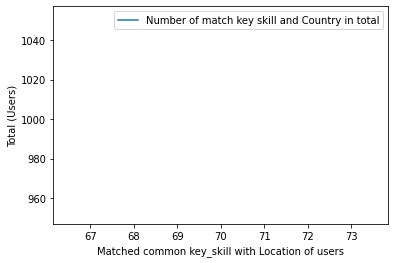

In [30]:
# Most common in  user `Communication` and are from `United States`
import pandas as pd
import matplotlib.pyplot as plt

"""
Create a query/algorithm that will find the most common user properties, and return them as a result.
For example the most common key skill of users in the database can be "Communication" or most of the users are from the United States ( key_skill: "Communication". country: "United States").
"""

df = pd.read_csv ('/root/SRE/user.csv')
count_row_original = df.shape[0] 
df = df.query('key_skill.str.contains("Communication") and  country.str.contains("United States")', engine='python')
count_row = df.shape[0] 

print(count_row)
print(count_row_original)

#Creating visualization representation of results with Matplotlib.
display(df)
plt.plot([count_row,], [count_row_original,], label='Number of match key skill and Country in total')
plt.xlabel("Matched common key_skill with Location of users")
plt.ylabel("Total (Users)")
plt.legend()

- Create a query/algorithm that will find any similarities between users, that would suggest a "strong" or “weak (fuzzy)” connection between any 2 or more users IF that type of connection exists in the database.

- Similarity between how many are engineer



In [36]:
import pandas as pd
import mysql.connector as sql

"""
Create a query/algorithm that will find any similarities between users, that would suggest a "strong" or “weak (fuzzy)” connection between any 2 or more users IF that type of connection exists in the database.
Similarity between how many are engineer
"""

db_connection = sql.connect(host='localhost', database='random_data', user='root', password='asderT@123', auth_plugin='mysql_native_password')

db_cursor = db_connection.cursor()

db_cursor = db_connection.cursor()

select_stmt = "SELECT * FROM user WHERE title LIKE '%Engineer%'"
db_cursor.execute( select_stmt)

table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows)
display(df)



""


,sno,id,uid,password,username,first_name,last_name,avatar,gender,email,...,zip_code,state,country,lat,lng,cc_number,plan,status,payment_method,term
16,16,6526,818100b7-3566-4ecc-94e8-6e1c12906011,4r9HDKLENm,maile.schmitt,Maile,Schmitt,https://robohash.org/nullaisteipsam.png?size=3...,Bigender,maile.schmitt@email.com,...,39589-1208,Alaska,United States,-63.941486,-75.397826,4861-9379-6596-9168,Student,Pending,Money transfer,Full subscription
18,18,9792,680d6a13-065b-4150-abcf-450a1059f262,0H1E4iNC38,ricarda.auer,Ricarda,Auer,https://robohash.org/quieadolor.png?size=300x3...,Female,ricarda.auer@email.com,...,84803,Colorado,United States,76.014819,-116.611292,6771-8967-1114-8887,Diamond,Active,Cheque,Full subscription
25,25,1041,d744579a-83d4-49f9-ad03-c327b008fd6e,n5dNQLGHfr,denny.o'reilly,Denny,O'Reilly,https://robohash.org/laboriosambeataeullam.png...,Non-binary,denny.o'reilly@email.com,...,15190,Mississippi,United States,-35.744141,117.946902,5583-8614-9849-3609,Professional,Blocked,Debit card,Full subscription
33,33,7723,fe9907d1-2a6d-4f39-9afe-61eb93498dd5,B6Mv4CcqJI,vergie.bahringer,Vergie,Bahringer,https://robohash.org/consequaturnullasunt.png?...,Non-binary,vergie.bahringer@email.com,...,13937,South Carolina,United States,16.542688,1.176170,6771-8937-9409-2934,Platinum,Pending,Debit card,Payment in advance
58,58,5147,7dd5a01e-a7e7-45b5-9eb6-bc495622e42b,zoptx9nsGu,eden.steuber,Eden,Steuber,https://robohash.org/cupiditateautitaque.png?s...,Polygender,eden.steuber@email.com,...,24525,New York,United States,82.710630,-45.166030,5235-8712-5405-2863,Silver,Idle,Visa checkout,Annual
71,71,8203,79820144-5bd5-45e3-afd6-6f72072213d2,a0EkQOZWcx,rhona.wisozk,Rhona,Wisozk,https://robohash.org/exquodillum.png?size=300x...,Male,rhona.wisozk@email.com,...,63318,Arizona,United States,-41.006843,5.232247,6771-8944-7400-7275,Platinum,Idle,WeChat Pay,Annual
79,79,6415,8dc92a42-2b9d-4df2-8bcf-b0bd471765d6,G3Dsyi6h8L,lynwood.mante,Lynwood,Mante,https://robohash.org/quositillo.png?size=300x3...,Non-binary,lynwood.mante@email.com,...,13673-7813,Connecticut,United States,-37.066253,-51.741361,4272-7629-3476-5171,Platinum,Blocked,Alipay,Full subscription
81,81,9288,4fd01c50-4fac-4f04-b040-8728473d0d37,dDK9VtFYnb,jon.casper,Jon,Casper,https://robohash.org/nostrumdolorumiure.png?si...,Agender,jon.casper@email.com,...,15834,Arkansas,United States,-13.746983,-158.571545,6771-8950-3088-4057,Bronze,Active,Google Pay,Annual
88,88,7330,058ea9ae-1474-4891-9cd2-cb335ed5dbc2,f4Pptc3x71,mauro.gottlieb,Mauro,Gottlieb,https://robohash.org/eiusvoluptatemdolorem.png...,Bigender,mauro.gottlieb@email.com,...,08520,Oregon,United States,-16.497975,-112.060520,4171-9581-1925-9566,Diamond,Active,Credit card,Full subscription
94,94,66,aba24257-49ea-4d76-9cae-07315ff032e9,tzJlTPXZBS,nathanael.fay,Nathanael,Fay,https://robohash.org/iddoloremconsequuntur.png...,Female,nathanael.fay@email.com,...,28989,Maine,United States,51.696966,-110.374141,5475-6224-2731-6886,Silver,Blocked,Credit card,Annual


50
1002


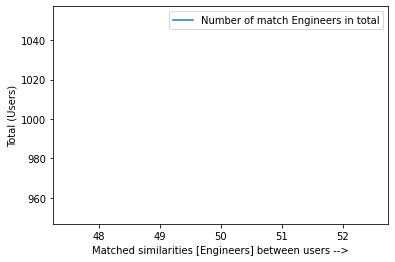

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
'''
Create a query/algorithm that will find any similarities between users, that would suggest a "strong" or “weak (fuzzy)” connection between any 2 or more users IF that type of connection exists in the database.
'''
df = pd.read_csv ('/root/SRE/user.csv')
count_row_original = df.shape[0]
df = df.query('title.str.contains("Engineer")',engine='python')
count_row = df.shape[0]
display(df)
print(count_row)
print(count_row_original)
# Create visualization representation of results with Matplotlib.
plt.plot([count_row,], [count_row_original,], label='Number of match Engineers in total')
plt.xlabel("Matched similarities [Engineers] between users -->")
plt.ylabel("Total (Users)")
plt.legend()

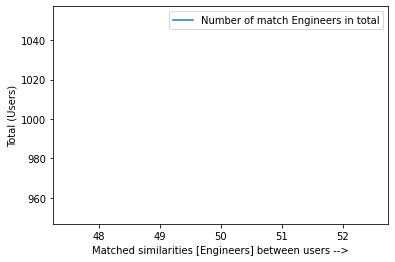

In [33]:
print("END OF THE ASSIGNMENT")

END OF THE ASSIGNMENT
